# Vectors and Matrices

#### Goal of this notebook

* How to initialize vectors and matrices in Python
* How to visualize vectors and matrices
* How to perform matrix-vector operations

The examples are in 2D


In [116]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as la

#### Matrix and Vector initialization

In [117]:
# Initialize vector in 2D
x = np.zeros(2)    # this sets the size and intializes with zero elements

# Add (arbitrary) values
x[0] = 1.
x[1] = .5

print("vector: x = ",x)

# initialize matrix (or tensor) in 2D 
e = np.zeros((2,2))    # this sets the size and intializes with zero elements

# Add (arbitrary) values
e[0,0] = 1.
e[1,1] = 2.
e[0,1] = .4
e[1,0] = -.2

print("tensor: e = ",e)

# Print transpose

print("tensor transpose: e^T = ",np.transpose(e))

vector: x =  [1.  0.5]
tensor: e =  [[ 1.   0.4]
 [-0.2  2. ]]
tensor transpose: e^T =  [[ 1.  -0.2]
 [ 0.4  2. ]]


#### Visualize Vectors and matrices

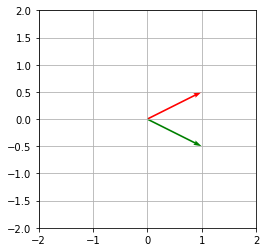

In [118]:
# Visualization of vectors with "quiver"
# The origin of the vectors is automatically set to [0,0]
plt.quiver(x[0],x[1],color='r',angles='xy', scale_units='xy', scale=1)
plt.quiver(x[0],-x[1],color='g',angles='xy', scale_units='xy', scale=1)
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.grid()
plt.show()



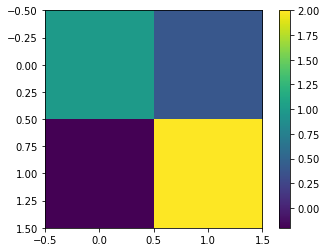

In [119]:
# Vizualize a tensor using imshow
plt.imshow(e)
plt.colorbar()
plt.show()



#### Matrix vector operations

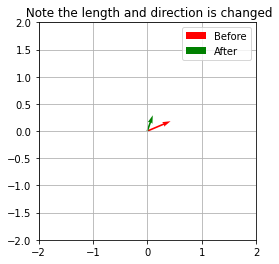

In [120]:
# Matrix operating on vector

# Let us use random vectors and matrices
x = np.random.rand(2)   # generates values between [0,1]
A = np.random.rand(2,2) # random 2 x 2 matrix

# Let us do matrix-vector multiply (the @ denots matrix-vector operation)
y = A@x       

# And visualize the effect of A on x

plt.quiver(x[0],x[1],color='r',angles='xy', scale_units='xy', scale=1)
plt.quiver(y[0],y[1],color='g',angles='xy', scale_units='xy', scale=1)
plt.legend(('Before','After'))
plt.axis('square')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title(' Note the length and direction is changed' )
plt.grid()
plt.show()


#### Remember: 

An square matrix A can be separated into a symmetric and antisymmetric part
    
$
A = \frac{1}{2} \left( A + A^T \right) + \frac{1}{2} \left( A - A^T \right)
$

where (to use "elasticity" terms)

$
\epsilon =\frac{1}{2} \left( A + A^T \right) 
$

is symmetric, and

$
r = \frac{1}{2} \left( A - A^T \right) 
$

is antisymmetric. Let us do this with python and observe the actions of $\epsilon$ and $r$ on a vector.  
Note that (normalized) antisymmetric matrices **do not change the length of a vector but just rotate it!**


[[0.49425458 0.59488396]
 [0.21776695 0.25949303]]
 Should be the same as 
[[0.49425458 0.59488396]
 [0.21776695 0.25949303]]
q.e.d.
Symmetric
[[0.49425458 0.40632545]
 [0.40632545 0.25949303]]
Anti-symmetric
[[ 0.         0.1885585]
 [-0.1885585  0.       ]]


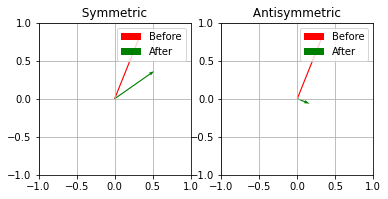

In [121]:
# Let us do matrix-vector multiply 

# Rerun this cell many times to see effects of different random matrices and vectors
# Fix the x vector to [1,0] or [0,1] or [1,1] to single out the effect of A


# Let us use random vectors and matrices
# x = [0,1]  # or [0,1] or [1,1]
x = np.random.rand(2)   # generates values between [0,1]
A = np.random.rand(2,2) # random 2 x 2 matrix

# Initialize epsilon and r 
e = 0.5 * (A + A.T)
r = 0.5 * (A - A.T)

# test it
print(e+r)
print(' Should be the same as ')
print(A)
print('q.e.d.')
print('Symmetric')
print(e)
print('Anti-symmetric')
print(r)

# Normalize r
norms = np.linalg.norm(r, axis = 1)
r = r/norms

# Action of symmetric matrix
y1 = e@x       
# Action of symmetric matrix
y2 = r@x


# And visualize the effect of A on x

plt.subplot(121)
plt.quiver(x[0],x[1],color='r',angles='xy', scale_units='xy', scale=1)
plt.quiver(y1[0],y1[1],color='g',angles='xy', scale_units='xy', scale=1)
plt.legend(('Before','After'))
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title(' Symmetric ' )
plt.grid()

plt.subplot(122)
plt.quiver(x[0],x[1],color='r',angles='xy', scale_units='xy', scale=1)
plt.quiver(y2[0],y2[1],color='g',angles='xy', scale_units='xy', scale=1)
plt.legend(('Before','After'))
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title(' Antisymmetric ' )
plt.grid()
plt.show()

## And now the Earth Science application 

After the Landers earthquake 1992 (M7.3) the following deformations were measured 80km south of the earthquake: e11=-0.26x10-6, e12=-0.69x10-6, e22=0.92x10-6. Indices 1 and 2 correspond to East and North, respectively. 

Let us assume a road stretch of 1km is oriented in N (or E) direction before the earthquake. How long is that road after the earthquake? Does it point in another direction?  

Remember the action of the strain tensor on a vector results in the "differential vector" due to deformation (see slides). 

Remember also the properties of the scalar product of two vectors (in Python x@y). 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Inner-product-angle.svg/1920px-Inner-product-angle.svg.png" style="width:200px" />



Note that the length of a vector x can be calculated with $np.linalg.norm(x)$. 

In [124]:
# Strain effects

# Initialize strain tensor
e11 = -0.26e-6
e12 = -0.69e-6
e22 =  0.92e-6

# Initialize strain tensor as ndarray with zeros
e = np.zeros((2,2))
x = np.zeros(2)

# Initialize strain tensor with physical values
e[0,0] = e11
e[0,1] = e12
e[1,0] = e12
e[1,1] = e22
print(' Strain: ', e)

# Initialize "road" vector
x[0] = 1000.
x[1] =0.   
print(' Road vector (before): ', x)


# Calculate road vector after the earthquake
x_after = x+e@x
print(' Road vector (after): ', x_after)

# Calculate the length change in m
Delta_x = np.linalg.norm(x)-np.linalg.norm(x_after)
print(' Length change: ',Delta_x,'m')

# Calculate the angular change
angle = np.arccos(x@x_after/(np.linalg.norm(x)*np.linalg.norm(x_after)))
# convert to deg
angle = angle/np.pi*180.

print(' Angular change:',angle,'deg')


 Strain:  [[-2.6e-07 -6.9e-07]
 [-6.9e-07  9.2e-07]]
 Road vector (before):  [1000.    0.]
 Road vector (after):  [ 9.9999974e+02 -6.9000000e-04]
 Length change:  0.00025999976196544594 m
 Angular change: 3.9532577923636654e-05 deg
